Moving Average (MA)

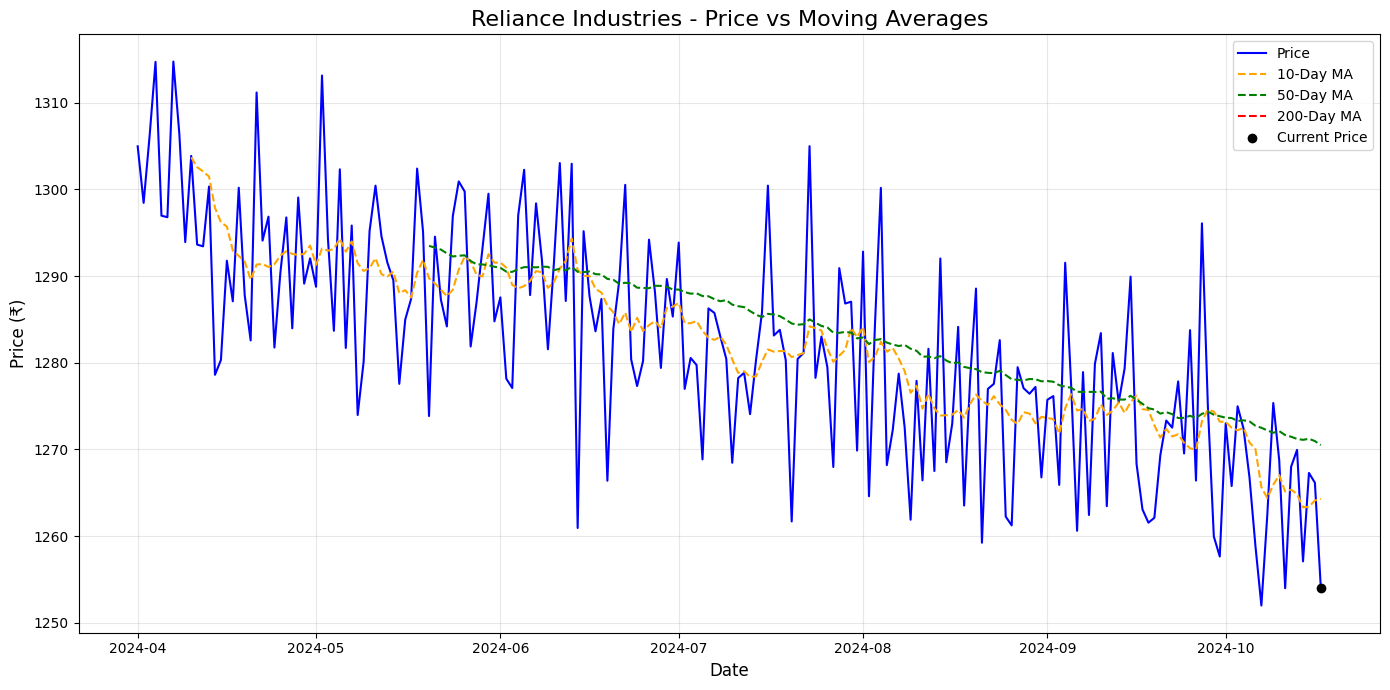

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulating data for Reliance stock (past 200 days)
np.random.seed(42)
dates = pd.date_range(start="2024-04-01", periods=200)
prices = np.linspace(1300, 1265.40, 200) + np.random.normal(0, 10, 200)  # Trend with random noise

# Create a DataFrame
data = pd.DataFrame({"Date": dates, "Price": prices})

# Calculate moving averages
data["10-Day MA"] = data["Price"].rolling(window=10).mean()
data["50-Day MA"] = data["Price"].rolling(window=50).mean()
data["200-Day MA"] = data["Price"].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data["Date"], data["Price"], label="Price", color="blue", linewidth=1.5)
plt.plot(data["Date"], data["10-Day MA"], label="10-Day MA", color="orange", linestyle="--")
plt.plot(data["Date"], data["50-Day MA"], label="50-Day MA", color="green", linestyle="--")
plt.plot(data["Date"], data["200-Day MA"], label="200-Day MA", color="red", linestyle="--")

# Highlight today's price
plt.scatter(data["Date"].iloc[-1], data["Price"].iloc[-1], color="black", label="Current Price", zorder=5)

# Formatting the plot
plt.title("Reliance Industries - Price vs Moving Averages", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


RSI Chart

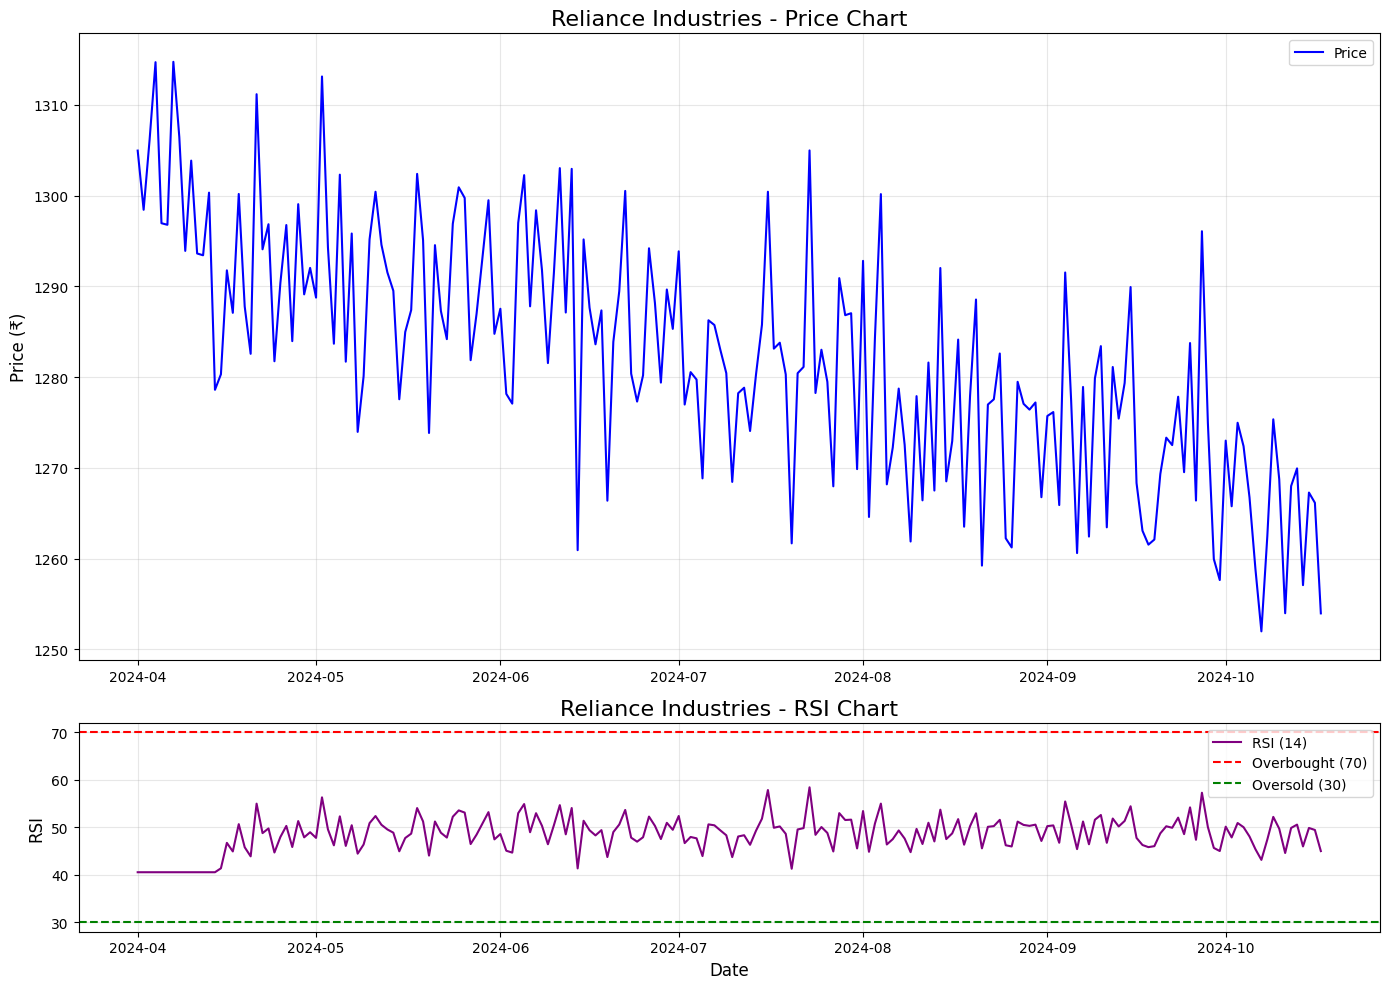

In [1]:
# Importing necessary libraries to create the chart (adjusted for environment limitations)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulating stock price data for 200 days
np.random.seed(42)
dates = pd.date_range(start="2024-04-01", periods=200)
prices = np.linspace(1300, 1265.40, 200) + np.random.normal(0, 10, 200)  # Simulate a trend with noise

# Calculating RSI manually for this environment
def calculate_rsi(prices, window=14):
    """Calculate RSI for a given price series."""
    deltas = np.diff(prices)
    seed = deltas[:window]
    up = seed[seed >= 0].sum() / window
    down = -seed[seed < 0].sum() / window
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:window] = 100 - (100 / (1 + rs))

    for i in range(window, len(prices)):
        delta = deltas[i - 1]  # Change from previous close
        if delta > 0:
            upval = delta
            downval = 0.0
        else:
            upval = 0.0
            downval = -delta

        up = (up * (window - 1) + upval) / window
        down = (down * (window - 1) + downval) / window

        rs = up / down if down != 0 else 0
        rsi[i] = 100 - (100 / (1 + rs))

    return rsi

# Create a DataFrame and calculate RSI
data = pd.DataFrame({"Date": dates, "Price": prices})
data["RSI"] = calculate_rsi(data["Price"].values, window=14)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Price chart
axs[0].plot(data["Date"], data["Price"], label="Price", color="blue", linewidth=1.5)
axs[0].set_title("Reliance Industries - Price Chart", fontsize=16)
axs[0].set_ylabel("Price (₹)", fontsize=12)
axs[0].grid(alpha=0.3)
axs[0].legend()

# RSI chart
axs[1].plot(data["Date"], data["RSI"], label="RSI (14)", color="purple", linewidth=1.5)
axs[1].axhline(70, color="red", linestyle="--", label="Overbought (70)")
axs[1].axhline(30, color="green", linestyle="--", label="Oversold (30)")
axs[1].set_title("Reliance Industries - RSI Chart", fontsize=16)
axs[1].set_xlabel("Date", fontsize=12)
axs[1].set_ylabel("RSI", fontsize=12)
axs[1].grid(alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()


Moving Average Convergence Divergence (MACD)

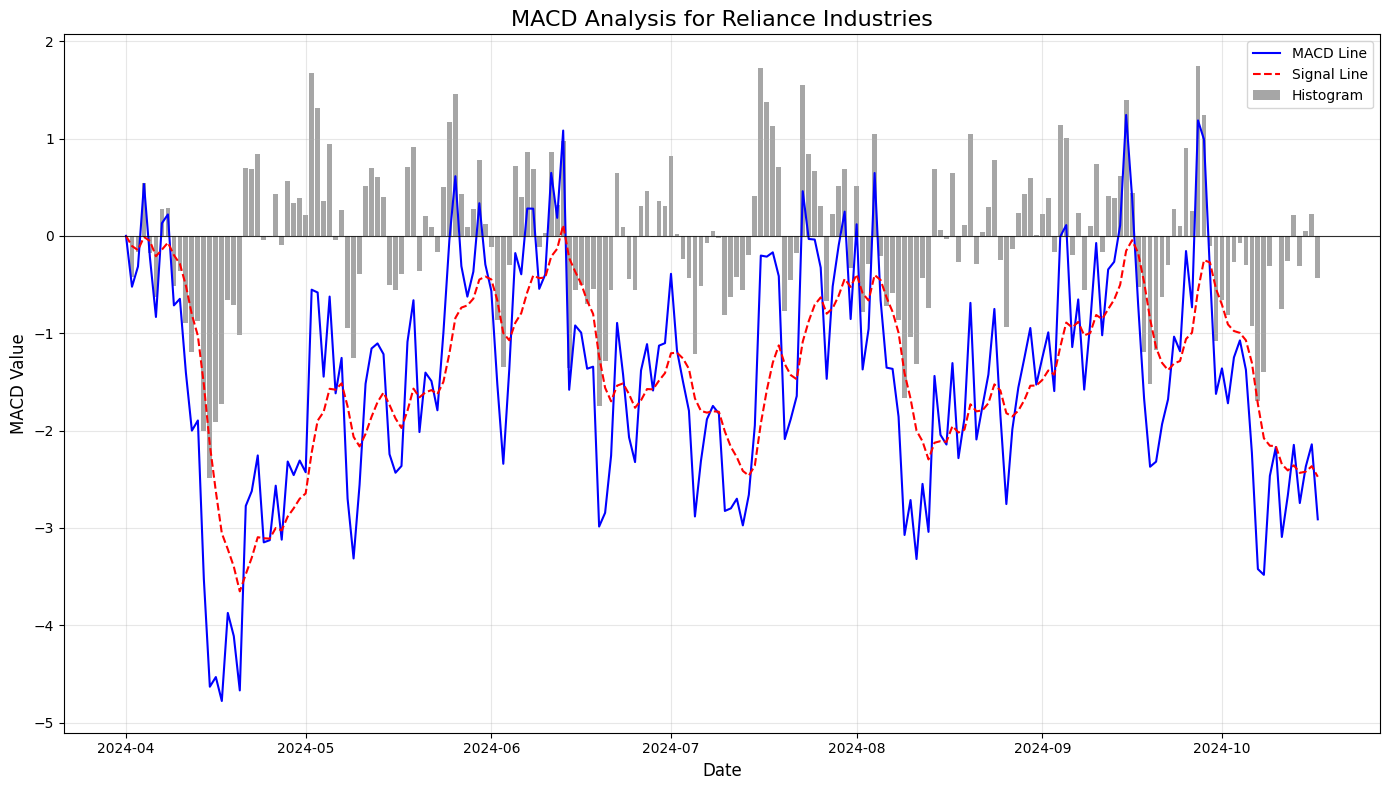

In [2]:
# Importing libraries for MACD calculation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating stock price data
np.random.seed(42)
dates = pd.date_range(start="2024-04-01", periods=200)
prices = pd.Series([1300 + i * (-0.2) + (10 * np.random.randn()) for i in range(200)])

# Calculating short-term (12-day) EMA, long-term (26-day) EMA, and MACD
short_ema = prices.ewm(span=12, adjust=False).mean()  # 12-day EMA
long_ema = prices.ewm(span=26, adjust=False).mean()  # 26-day EMA
macd = short_ema - long_ema  # MACD line
signal_line = macd.ewm(span=9, adjust=False).mean()  # Signal line
histogram = macd - signal_line  # Histogram

# Plotting MACD, Signal line, and Histogram
plt.figure(figsize=(14, 8))

# MACD Line and Signal Line
plt.plot(dates, macd, label="MACD Line", color="blue", linewidth=1.5)
plt.plot(dates, signal_line, label="Signal Line", color="red", linestyle="--", linewidth=1.5)

# Histogram
plt.bar(dates, histogram, color='gray', alpha=0.7, label="Histogram")

# Customizing the chart
plt.title("MACD Analysis for Reliance Industries", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("MACD Value", fontsize=12)
plt.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.8)  # Zero line for reference
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()
